In [11]:
# add local directory to import path
import os
import sys
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [21]:
#### --- Standard imports ------
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# local import
import nfl_bdb24
import nflutil
import nflplot

In [13]:
track_df = pd.DataFrame()
play_df = pd.read_csv('csv/plays.csv')
game_df = pd.read_csv('csv/games.csv')
player_df= pd.read_csv('csv/players.csv')
tackle_df = pd.read_csv('csv/tackles.csv')

# metric file
metric_df = pd.read_csv('interm_files/feat_tackle_metrics.csv')

# tracking data for all weeks
weeks = range(1,10)
for week in weeks:
    track_df = pd.concat([track_df, pd.read_csv(f'csv/tracking_week_{week}.csv').pipe(nflutil.transform_tracking_data)], ignore_index=True)

# Create overall metric

In [14]:
weight_gap = 1
weight_vision = 1
weight_drive = 1

metric_df['overall_metric'] = (
                                ((weight_gap * metric_df.tackle_gap_metric) + (weight_vision * metric_df.vision_metric) + (weight_drive * metric_df.drive_metric)) 
                               / (weight_gap + weight_vision + weight_drive)
                               )

metric_df

,gameId,playId,contactFrameId,tackleFrameId,frames,d_actual,d_ideal,d_eff,gap_tackle,w_carrier,...,nflId_t,displayName_t,position_t,ballCarrierId,displayName,position,drive_metric,tackle_gap_metric,vision_metric,overall_metric
0,2022090800,56,10,18,8,5.01,5.006246,0.999251,0.670298,191,...,43294,Jalen Ramsey,CB,42489,Stefon Diggs,WR,0.610615,1.000000,0.951500,0.854038
1,2022090800,80,20,26,6,4.87,3.768183,0.773754,0.367696,237,...,53532,Ernest Jones,ILB,46076,Josh Allen,QB,0.424705,1.000000,0.773754,0.732820
2,2022090800,101,38,45,7,8.01,5.029374,0.627887,2.476812,203,...,42816,Troy Hill,CB,47857,Devin Singletary,RB,0.408920,0.000000,0.627887,0.345602
3,2022090800,122,20,29,9,12.09,11.855248,0.980583,0.573149,203,...,38577,Bobby Wagner,ILB,47857,Devin Singletary,RB,0.380032,1.000000,0.980583,0.786872
4,2022090800,167,14,18,4,7.00,6.968414,0.995488,1.591540,191,...,43298,Leonard Floyd,DE,42489,Stefon Diggs,WR,0.308930,0.510575,0.951500,0.590335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,2022110700,3658,40,55,15,13.06,12.127753,0.928618,1.341343,211,...,44871,Tanoh Kpassagnon,DE,43362,Kenyan Drake,RB,0.670777,0.823322,0.928618,0.807572
6638,2022110700,3686,42,72,30,8.39,6.245190,0.744361,1.015135,211,...,48027,Kaden Elliss,OLB,43362,Kenyan Drake,RB,0.545607,1.000000,0.744361,0.763323
6639,2022110700,3707,39,54,15,9.29,9.080666,0.977467,1.452790,211,...,48027,Kaden Elliss,OLB,43362,Kenyan Drake,RB,0.511397,0.684012,0.977467,0.724292
6640,2022110700,3740,31,38,7,10.29,9.281939,0.902035,0.733757,211,...,48537,Carl Granderson,DE,43362,Kenyan Drake,RB,0.488677,1.000000,0.902035,0.796904


In [15]:
# attach running team and tackling team to each play
metric_df = metric_df.merge(play_df[['gameId','playId','possessionTeam','defensiveTeam']], on=['gameId','playId'], how='left')
metric_df

,gameId,playId,contactFrameId,tackleFrameId,frames,d_actual,d_ideal,d_eff,gap_tackle,w_carrier,...,position_t,ballCarrierId,displayName,position,drive_metric,tackle_gap_metric,vision_metric,overall_metric,possessionTeam,defensiveTeam
0,2022090800,56,10,18,8,5.01,5.006246,0.999251,0.670298,191,...,CB,42489,Stefon Diggs,WR,0.610615,1.000000,0.951500,0.854038,BUF,LA
1,2022090800,80,20,26,6,4.87,3.768183,0.773754,0.367696,237,...,ILB,46076,Josh Allen,QB,0.424705,1.000000,0.773754,0.732820,BUF,LA
2,2022090800,101,38,45,7,8.01,5.029374,0.627887,2.476812,203,...,CB,47857,Devin Singletary,RB,0.408920,0.000000,0.627887,0.345602,BUF,LA
3,2022090800,122,20,29,9,12.09,11.855248,0.980583,0.573149,203,...,ILB,47857,Devin Singletary,RB,0.380032,1.000000,0.980583,0.786872,BUF,LA
4,2022090800,167,14,18,4,7.00,6.968414,0.995488,1.591540,191,...,DE,42489,Stefon Diggs,WR,0.308930,0.510575,0.951500,0.590335,BUF,LA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,2022110700,3658,40,55,15,13.06,12.127753,0.928618,1.341343,211,...,DE,43362,Kenyan Drake,RB,0.670777,0.823322,0.928618,0.807572,BAL,NO
6638,2022110700,3686,42,72,30,8.39,6.245190,0.744361,1.015135,211,...,OLB,43362,Kenyan Drake,RB,0.545607,1.000000,0.744361,0.763323,BAL,NO
6639,2022110700,3707,39,54,15,9.29,9.080666,0.977467,1.452790,211,...,OLB,43362,Kenyan Drake,RB,0.511397,0.684012,0.977467,0.724292,BAL,NO
6640,2022110700,3740,31,38,7,10.29,9.281939,0.902035,0.733757,211,...,DE,43362,Kenyan Drake,RB,0.488677,1.000000,0.902035,0.796904,BAL,NO


In [64]:
metric_df.columns

Index(['gameId', 'playId', 'contactFrameId', 'tackleFrameId', 'frames',
       'd_actual', 'd_ideal', 'd_eff', 'gap_tackle', 'w_carrier', 'w_tackler',
       's_downfield_delta', 's_contact', 's_downfield_contact',
       's_downfield_contact_t', 'tackle_category', 'nflId_t', 'displayName_t',
       'position_t', 'ballCarrierId', 'displayName', 'position',
       'drive_metric', 'tackle_gap_metric', 'vision_metric', 'overall_metric',
       'possessionTeam', 'defensiveTeam'],
      dtype='object')

# Investigate top and lowest evaluated metric plays
Limit to proactive plays

In [16]:
metric_df.query('tackle_category=="proactive"').sort_values('overall_metric', ascending=False)

,gameId,playId,contactFrameId,tackleFrameId,frames,d_actual,d_ideal,d_eff,gap_tackle,w_carrier,...,position_t,ballCarrierId,displayName,position,drive_metric,tackle_gap_metric,vision_metric,overall_metric,possessionTeam,defensiveTeam
3248,2022100901,735,38,51,13,8.95,8.577797,0.958413,0.434166,237,...,DT,46076,Josh Allen,QB,0.959325,1.000000,0.958413,0.972579,BUF,PIT
1079,2022091804,2742,42,58,16,5.29,4.907504,0.927695,0.554707,215,...,FS,37101,Mark Ingram,RB,0.982616,1.000000,0.927695,0.970104,NO,TB
4223,2022101605,832,30,54,24,3.54,3.427200,0.968136,0.431393,240,...,MLB,44927,Samaje Perine,RB,0.932625,1.000000,0.968136,0.966920,CIN,NO
1381,2022091811,1076,35,64,29,7.37,7.287935,0.988865,0.864523,233,...,SS,44917,James Conner,RB,0.903541,1.000000,0.988865,0.964135,ARI,LV
2177,2022092511,1170,34,59,25,7.89,7.738863,0.980844,0.769220,238,...,NT,39975,Cordarrelle Patterson,RB,0.908342,1.000000,0.980844,0.963062,ATL,SEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,2022091811,1435,58,65,7,9.58,3.559508,0.371556,2.032166,210,...,CB,52630,Eno Benjamin,RB,0.548676,0.000000,0.371556,0.306744,ARI,LV
6322,2022110605,1083,49,62,13,7.73,4.033472,0.521795,5.990676,246,...,FS,53549,Rhamondre Stevenson,RB,0.397701,0.000000,0.521795,0.306499,NE,IND
2411,2022092900,3527,47,60,13,12.17,4.332320,0.355984,2.914464,220,...,CB,44860,Joe Mixon,RB,0.503997,0.000000,0.355984,0.286660,CIN,MIA
5395,2022103000,3240,39,57,18,6.88,3.336495,0.484956,1.978004,200,...,CB,53454,Travis Etienne,RB,0.334783,0.027495,0.484956,0.282411,JAX,DEN


In [17]:
metric_df.query('tackle_category=="reactive"').sort_values('overall_metric', ascending=False)

,gameId,playId,contactFrameId,tackleFrameId,frames,d_actual,d_ideal,d_eff,gap_tackle,w_carrier,...,position_t,ballCarrierId,displayName,position,drive_metric,tackle_gap_metric,vision_metric,overall_metric,possessionTeam,defensiveTeam
1914,2022092505,3416,40,60,20,11.54,10.496523,0.909577,0.520865,246,...,ILB,53549,Rhamondre Stevenson,RB,1.000000,1.0,0.909577,0.969859,NE,BAL
1119,2022091805,1765,10,35,25,3.72,3.668378,0.986123,0.272947,185,...,OLB,46309,Richie James,WR,0.943578,1.0,0.951500,0.965026,NYG,CAR
1665,2022092500,2284,33,60,27,6.96,6.726500,0.966451,0.639531,215,...,DE,44879,Alvin Kamara,RB,0.901635,1.0,0.966451,0.956029,NO,CAR
2636,2022100204,1022,34,53,19,8.38,7.884060,0.940819,0.337343,228,...,SS,43293,Ezekiel Elliott,RB,0.919211,1.0,0.940819,0.953343,DAL,WAS
6351,2022110606,261,7,28,21,3.82,3.808648,0.997028,0.451885,191,...,CB,42489,Stefon Diggs,WR,0.855335,1.0,0.951500,0.935612,BUF,NYJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5858,2022103009,3253,23,28,5,5.95,3.551281,0.596854,3.118237,210,...,DT,42831,Taylor Heinicke,QB,0.243442,0.0,0.596854,0.280099,WAS,IND
2102,2022092509,3430,28,36,8,10.24,3.853232,0.376292,2.527865,200,...,CB,53454,Travis Etienne,RB,0.463273,0.0,0.376292,0.279855,JAX,LAC
4540,2022101611,2901,32,49,17,7.61,3.806691,0.500222,6.650451,228,...,OLB,43293,Ezekiel Elliott,RB,0.335969,0.0,0.500222,0.278730,DAL,PHI
5778,2022103008,467,28,42,14,9.30,3.383031,0.363767,4.945948,181,...,CB,47849,Diontae Johnson,WR,0.431833,0.0,0.363767,0.265200,PIT,PHI


# Look at overall metric by tackling team
Higher = better tackling fundamentals

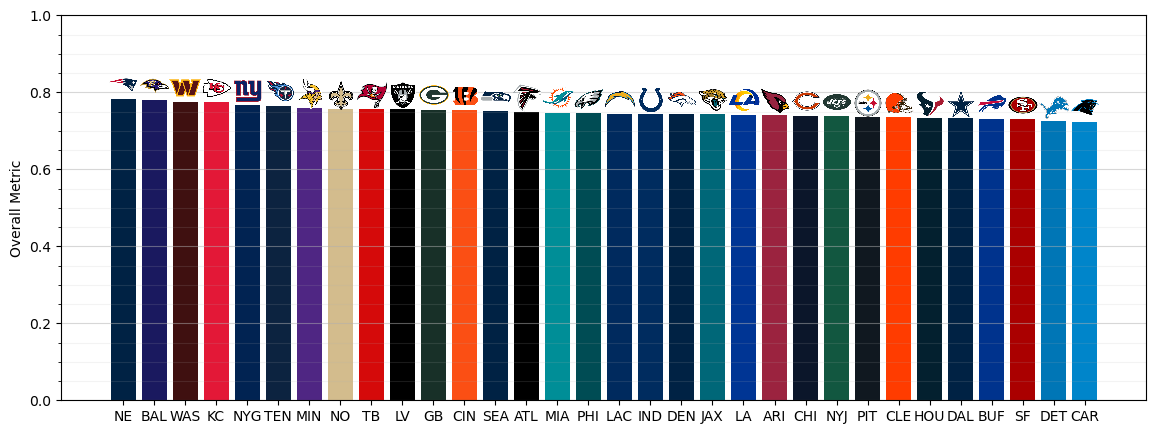

In [26]:
x = metric_df.query('tackle_category=="proactive"').filter(['defensiveTeam', 'overall_metric']).groupby(['defensiveTeam']).mean().sort_values('overall_metric', ascending=False).reset_index()

#create figure
f, ax = plt.subplots(figsize=(14,5))
# create bar plot
ax = nflplot.create_team_bar_plot(ax, x['defensiveTeam'], x['overall_metric'])
# set labels and grid
ax.set_ylabel('Overall Metric')
ax.set_ylim([0, 1])
# ax.set_title('Predicted Yards Forfeited per Fair Catch (PYF/FC) by Team, 2020 Season')
ax.minorticks_on()
ax.tick_params(axis='x', which='minor', bottom=False)
ax.grid(visible=True, which='major', axis='y', alpha=0.5)
ax.grid(visible=True, which='minor', axis='y', alpha=0.15)

plt.show()

# Look at overall metric by possession team
Lower = better at forcing poor tackling technique

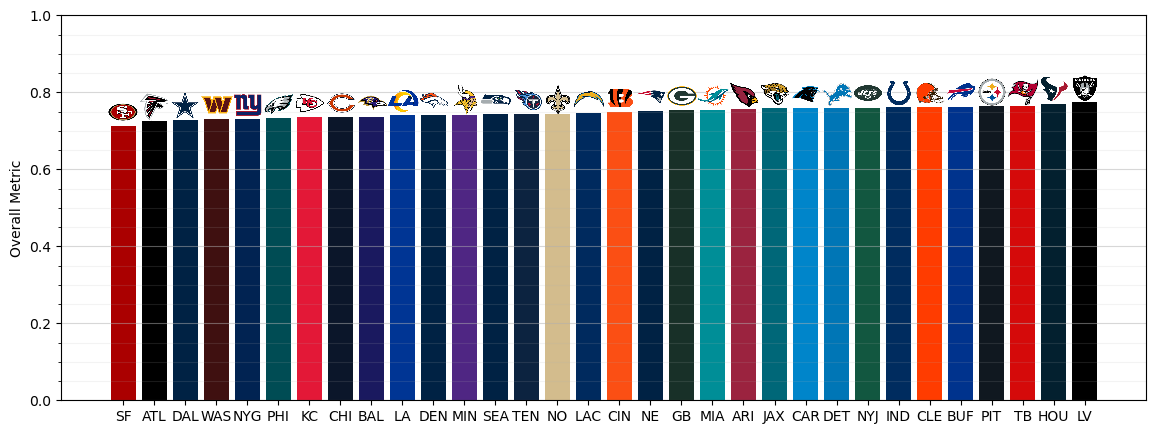

In [27]:
x = metric_df.query('tackle_category=="proactive"').filter(['possessionTeam', 'overall_metric']).groupby(['possessionTeam']).mean().sort_values('overall_metric', ascending=True).reset_index()

#create figure
f, ax = plt.subplots(figsize=(14,5))
# create bar plot
ax = nflplot.create_team_bar_plot(ax, x['possessionTeam'], x['overall_metric'])
# set labels and grid
ax.set_ylabel('Overall Metric')
ax.set_ylim([0, 1])
# ax.set_title('Predicted Yards Forfeited per Fair Catch (PYF/FC) by Team, 2020 Season')
ax.minorticks_on()
ax.tick_params(axis='x', which='minor', bottom=False)
ax.grid(visible=True, which='major', axis='y', alpha=0.5)
ax.grid(visible=True, which='minor', axis='y', alpha=0.15)

plt.show()

In [67]:
a = metric_df.query('tackle_category=="proactive"').groupby('nflId_t').aggregate({'nflId_t':'count', 'overall_metric': ['mean', 'min', 'max'], 'vision_metric': 'mean', 'tackle_gap_metric': 'mean', 'drive_metric': 'mean'}).reset_index()
a.columns = a.columns.map('|'.join).str.strip('|')

In [69]:
a.loc[a['nflId_t|count'] >= 10, :].sort_values('overall_metric|mean', ascending=False).merge(player_df[['nflId','displayName','position']], left_on='nflId_t', right_on='nflId', how='left')

,nflId_t,nflId_t|count,overall_metric|mean,overall_metric|min,overall_metric|max,vision_metric|mean,tackle_gap_metric|mean,drive_metric|mean,nflId,displayName,position
0,53448,12,0.849086,0.784179,0.924593,0.938099,1.000000,0.609160,53448,Jamin Davis,OLB
1,46142,10,0.818305,0.734388,0.863127,0.935241,0.990656,0.529019,46142,Jerome Baker,ILB
2,52431,10,0.818192,0.772507,0.871889,0.900655,1.000000,0.553921,52431,Kenneth Murray,ILB
3,46088,11,0.817889,0.674549,0.904317,0.926608,0.960172,0.566888,46088,Leighton Vander Esch,OLB
4,46652,11,0.813608,0.711741,0.876072,0.892546,0.985844,0.562433,46652,Chandon Sullivan,CB
...,...,...,...,...,...,...,...,...,...,...,...
152,53609,13,0.638398,0.393182,0.878585,0.908096,0.478482,0.528617,53609,Talanoa Hufanga,SS
153,45287,11,0.635589,0.397139,0.855612,0.955202,0.449419,0.502147,45287,Kenny Moore,CB
154,54533,13,0.635144,0.453708,0.879364,0.949463,0.411231,0.544737,54533,Martin Emerson,CB
155,52411,19,0.628919,0.317167,0.894911,0.918041,0.507955,0.460760,52411,Jeff Okudah,CB


Next up: map positions to position groups so that comparisons can be done within groups

In [70]:
metric_df.query('nflId_t==53448')

,gameId,playId,contactFrameId,tackleFrameId,frames,d_actual,d_ideal,d_eff,gap_tackle,w_carrier,...,position_t,ballCarrierId,displayName,position,drive_metric,tackle_gap_metric,vision_metric,overall_metric,possessionTeam,defensiveTeam
956,2022091802,618,34,55,21,6.70,5.488506,0.819180,0.944299,213,...,OLB,44947,Jamaal Williams,RB,0.537543,1.0,0.819180,0.785574,DET,WAS
972,2022091802,2238,34,42,8,7.76,7.659569,0.987058,0.376431,211,...,OLB,52443,D'Andre Swift,RB,0.566769,1.0,0.987058,0.851276,DET,WAS
2023,2022092508,1679,32,47,15,5.67,5.411174,0.954352,0.281603,191,...,OLB,53579,Kenneth Gainwell,RB,0.677153,1.0,0.954352,0.877168,PHI,WAS
2031,2022092508,2473,38,48,10,12.45,12.416139,0.997280,0.574543,211,...,OLB,47836,Miles Sanders,RB,0.459053,1.0,0.997280,0.818778,PHI,WAS
2667,2022100204,3428,27,41,14,4.85,4.241992,0.874638,1.182709,228,...,OLB,43293,Ezekiel Elliott,RB,0.477899,1.0,0.874638,0.784179,DAL,WAS
3637,2022100909,75,11,19,8,4.75,4.739251,0.997737,0.975141,215,...,OLB,53074,Nick Westbrook-Ikhine,WR,0.354326,1.0,0.951500,0.768609,TEN,WAS
3646,2022100909,940,29,38,9,7.05,6.583168,0.933783,0.851469,247,...,OLB,43334,Derrick Henry,RB,0.516814,1.0,0.933783,0.816866,TEN,WAS
3649,2022100909,1176,17,24,7,7.80,7.751361,0.993764,1.106029,250,...,OLB,54608,Chigoziem Okonkwo,TE,0.482819,1.0,0.951500,0.811440,TEN,WAS
3656,2022100909,1814,1,12,11,0.00,0.000000,NaN,0.606383,247,...,OLB,43334,Derrick Henry,RB,0.370402,1.0,0.951500,0.773967,TEN,WAS
3951,2022101300,1454,19,22,3,12.61,12.519988,0.992862,0.572189,172,...,OLB,52581,Darnell Mooney,WR,0.335855,1.0,0.951500,0.762452,CHI,WAS
